In [1]:
using Pkg
Pkg.status()
VERSION

Status `~/.julia/environments/v1.9/Project.toml`
⌅ [7d9fca2a] Arpack v0.5.3
  [861a8166] Combinatorics v1.0.2
  [a93c6f00] DataFrames v1.6.1
  [b7d42ee7] Einsum v0.4.1
  [d853e229] GroupSlices v0.0.3
  [7073ff75] IJulia v1.25.0
  [a98d9a8b] Interpolations v0.15.1
  [b964fa9f] LaTeXStrings v1.3.1
  [0db19996] NBInclude v2.3.1
  [6fe1bfb0] OffsetArrays v1.14.1
  [91a5bcdd] Plots v1.40.5
  [49802e3a] ProgressBars v1.5.1
⌃ [92933f4c] ProgressMeter v1.10.0
  [d330b81b] PyPlot v2.11.5
⌃ [6e0679c1] QuantumOptics v1.0.9
⌃ [295af30f] Revise v3.5.15
  [2913bbd2] StatsBase v0.34.3
⌅ [0c5d862f] Symbolics v5.11.0
  [afbbf031] TypedPolynomials v0.4.1
  [9e88b42a] Serialization
  [2f01184e] SparseArrays
Info Packages marked with ⌃ and ⌅ have new versions available, but those with ⌅ are restricted by compatibility constraints from upgrading. To see why use `status --outdated`


v"1.9.3"

In [2]:
using QuantumOptics
using SparseArrays
using Plots
using LinearAlgebra
using ProgressMeter
using Revise
using LaTeXStrings
includet("../Scripts/FirstBandApproximation.jl")
includet("../Scripts/ManyBody.jl")
includet("KM_Model.jl")

In [3]:
Nx = 4
Ny = 4
p = 1
q = 2
pn = 4
U = 1000

N = Nx*Ny
t = 1
NPhi0 = Int(Nx*Ny*(p/q))
Cut_Off = NPhi0

8

In [4]:
matrix = KM(Nx, Ny, t, p, q);

In [5]:
HardCore = true
H_proj_hardcore = H_Hubbard_Projection(N, pn, matrix, Cut_Off, HardCore);

In [6]:
ϵ_hard_core, λ_hard_core = eigenstates(H_proj_hardcore);

In [7]:
HardCore = false
H_proj_finite = H_Hubbard_Projection(N, pn, matrix, Cut_Off, HardCore);

In [8]:
ϵ_finite, λ_finite = eigenstates(H_proj_finite);

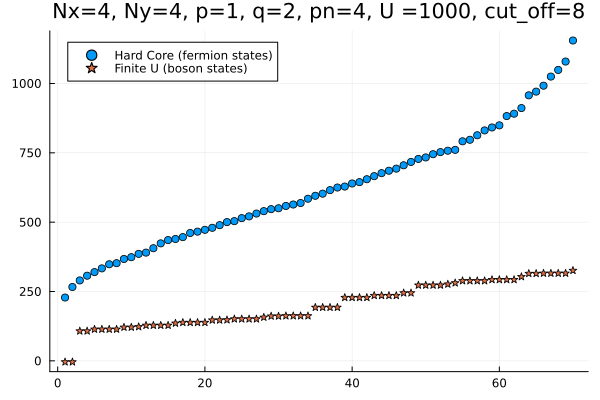

In [12]:
n=1
m=70
scatter(ϵ_hard_core[n:m], label="Hard Core (fermion states)", title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U), cut_off=$(Cut_Off)")
scatter!(ϵ_finite[n:m], label="Finite U (boson states)",marker=:star)

In [32]:
HardCore = true
H_full_hard_core =  H_Hubbard(N, pn, matrix, HardCore);

In [33]:
E_full_hard_core, λ_full_hard_core = eigenstates(dense(H_full_hard_core));

In [34]:
HardCore = false
H_full_finite =  H_Hubbard(N, pn, matrix, HardCore);

In [35]:
E_full_finite, λ_full_finite = eigenstates(dense(H_full_finite));

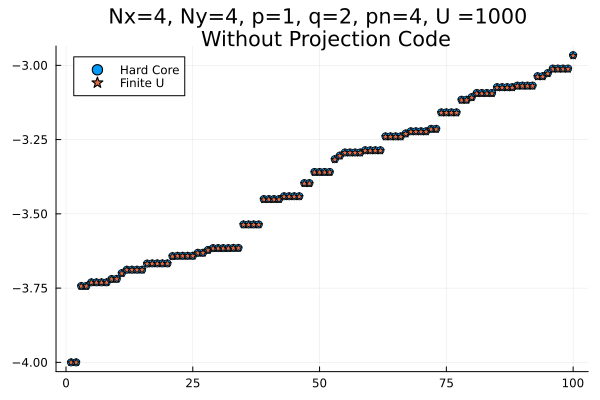

In [37]:
#ion()
n=1
m=100
scatter(E_full_hard_core[n:m], label="Hard Core", title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U) \n Without Projection Code")
scatter!(E_full_finite[n:m], label="Finite U",marker=:star)

#show()

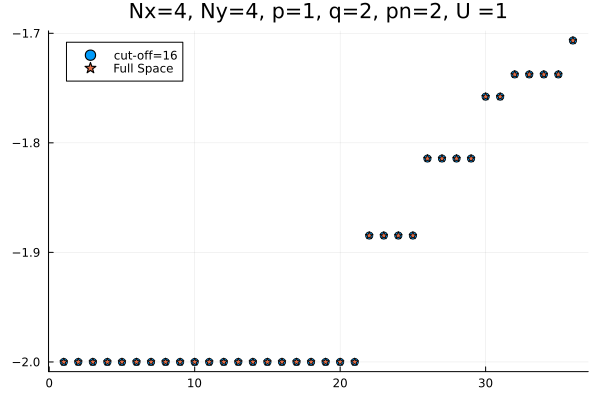

In [11]:
#ion()
n=1
m=36
scatter(ϵ_finite[n:m], label="cut-off=$(Cut_Off)", title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U)")
scatter!(E_full_finite[n:m], label="Full Space",marker=:star)

#show()